In [4]:
# Numerical libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd
# importing ploting libraries
from matplotlib import pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd
# reading the CSV file into pandas dataframe
mydata = pd.read_csv('Depression.csv')
mydata.drop('id', axis=1, inplace=True)

In [5]:
mydata.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


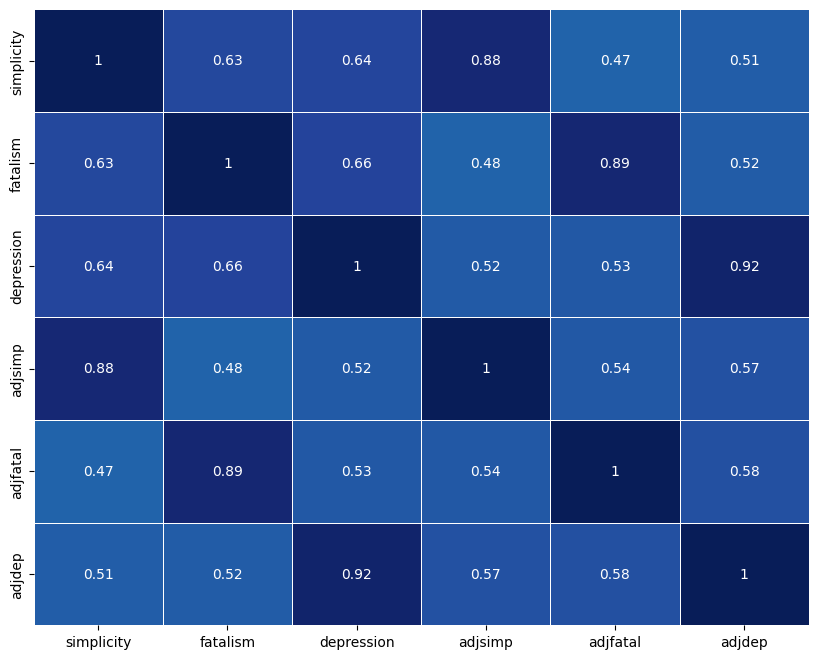

In [7]:
# Checking Correlation

# — — — — — — — — — — — — — — — -Heat map to identify highly correlated variables — — — — — — — — — — — — -
#-------------------------------Heat map to identify highly correlated variables-------------------------
plt.figure(figsize=(10,8))
sns.heatmap(mydata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

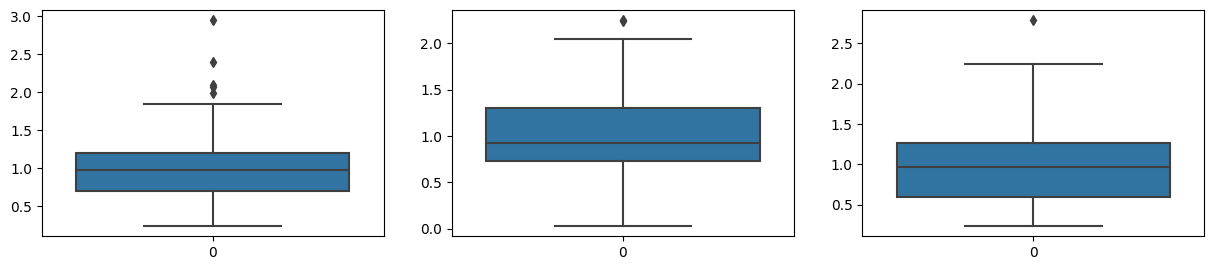

In [8]:
# Outlier Detection and Treatment

mydata.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)
#--Checking Outliers
plt.figure(figsize=(15,10))
pos = 1
for i in mydata.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(mydata[i])
    pos += 1

In [9]:
col_names=list(mydata.columns)
display(col_names)
for i in col_names:
 q1, q2, q3 = mydata[i].quantile([0.25,0.5,0.75])
 IQR = q3 - q1
 lower_cap=q1-1.5*IQR
 upper_cap=q3+1.5*IQR
 mydata[i]=mydata[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['adjsimp', 'adjfatal', 'adjdep']

In [10]:
# Standardizing the Attributes/Clustering variables

##Scale the data
from scipy.stats import zscore
mydata_z = mydata.apply(zscore)
mydata_z.head()

,adjsimp,adjfatal,adjdep
0,-0.501853,-1.813141,-1.205908
1,-0.575313,0.002917,-0.999865
2,-0.816015,-1.952782,-0.601098
3,-0.328581,-1.171207,-0.707234
4,-1.146642,-0.373392,-0.961480


In [11]:
# K Means Clustering using Sklearn

# List to store cluster and intra cluster distance
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(mydata_z)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


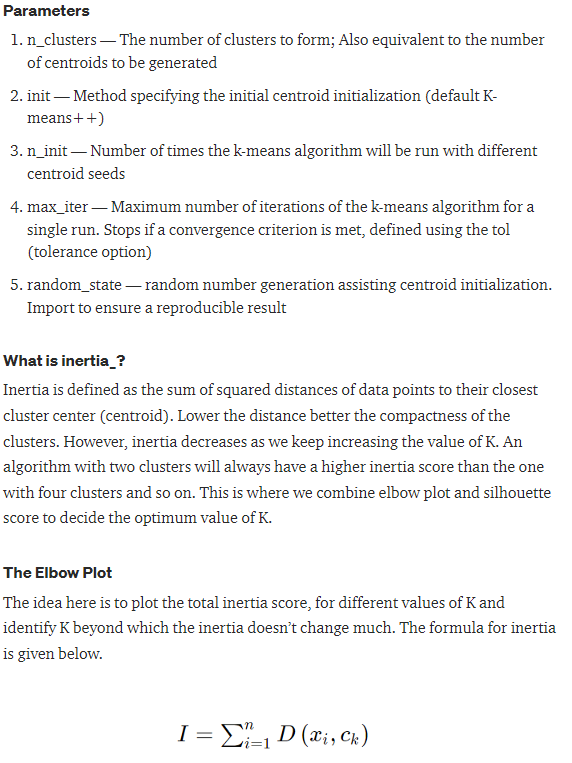

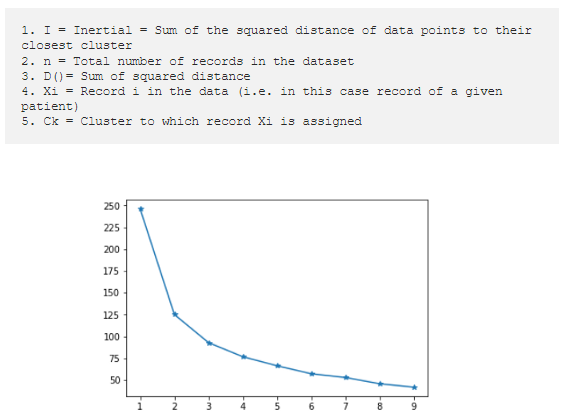

In [12]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.40099183297222984
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.3191854112351335
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.2700254215152798
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.27233131752766193
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.2812928582996051
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.28278984231031096
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.26846585451842553
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.2698216638934609


Silhouette score observing the local maxima is used to determine the optimum number of clusters along with the Elbow plot.\
Hence in this example we can go ahead with 6 as the optimal number of clusters.

### Clustering problems using K-Means

In [13]:
from sklearn.datasets import make_blobs
# Generate synthetic dataset with 10 random clusters in 2 dimensional space
X, y = make_blobs(n_samples=1000, n_features=2, centers=10, random_state=42)

In [19]:
pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

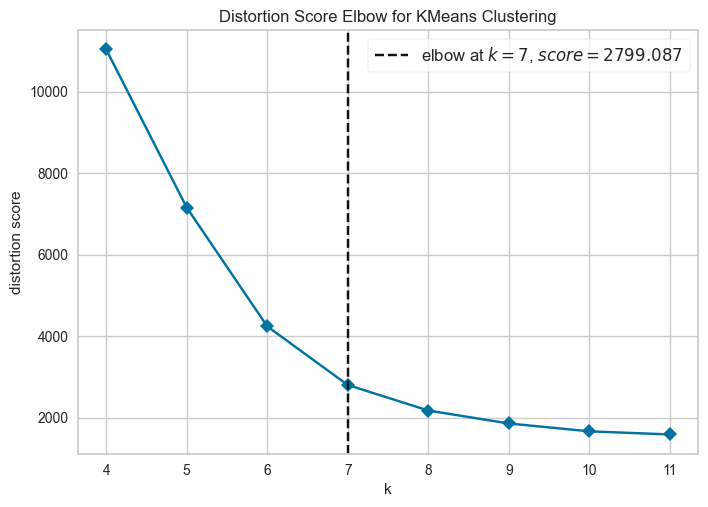

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Recently I discovered a library named Yellowbrick which can help us to plot the Elbow curve with just 1 line of code. 
# It is a wrapper around Scikit-Learn and hence integrate well with it.

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [21]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

The code below will generate a single Sillhouette graph for K=7, you can refer my notebook on how you can loop through it to generate multiple plots.

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


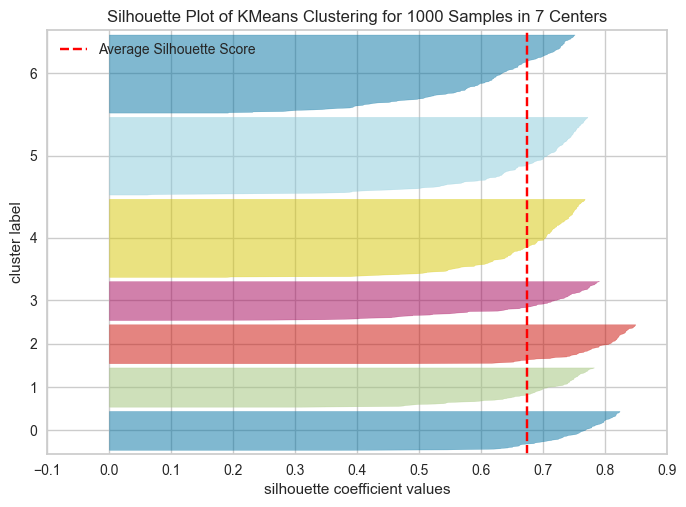

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

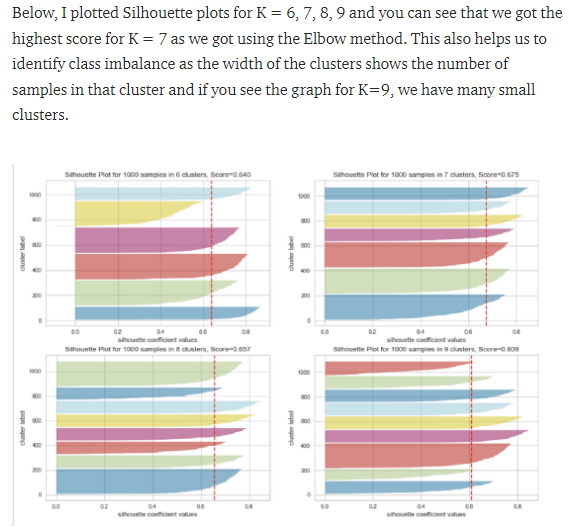

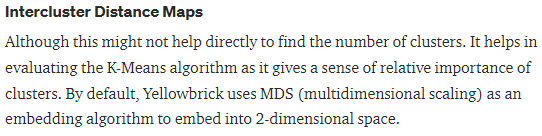

In [23]:
model = KMeans(7)
visualizer = InterclusterDistance(model, random_state=0)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x550 with 2 Axes>

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
model = KMeans(n_clusters=7)
# fit X
model.fit(X)
# predict labels 
y_pred = model.predict(X)
# plot results
#sns.scatterplot(x='feature1', y='feature2', hue='y_pred', data=data)

In [ ]:
y_pred

array([5, 0, 1, 4, 5, 1, 6, 2, 3, 1, 4, 6, 4, 1, 1, 1, 6, 4, 1, 5, 4, 4,
       1, 3, 6, 3, 1, 1, 3, 2, 1, 4, 2, 6, 3, 2, 4, 1, 6, 5, 4, 5, 3, 1,
       5, 3, 2, 3, 0, 4, 1, 1, 0, 3, 3, 0, 3, 2, 5, 3, 1, 4, 2, 6, 4, 3,
       5, 1, 3, 4, 6, 6, 0, 1, 1, 4, 3, 3, 3, 2, 3, 4, 1, 4, 0, 3, 2, 4,
       4, 0, 0, 4, 5, 1, 4, 4, 4, 5, 3, 4, 4, 3, 2, 4, 4, 0, 3, 4, 1, 4,
       2, 4, 3, 4, 5, 0, 1, 5, 2, 5, 6, 1, 1, 1, 0, 6, 4, 2, 4, 0, 5, 4,
       3, 2, 0, 4, 4, 3, 4, 4, 2, 6, 2, 1, 1, 1, 4, 6, 6, 1, 4, 3, 4, 4,
       3, 1, 0, 2, 2, 3, 4, 1, 2, 3, 2, 1, 1, 0, 6, 1, 0, 5, 6, 1, 3, 1,
       4, 1, 1, 1, 2, 3, 4, 1, 3, 4, 4, 0, 6, 1, 6, 3, 2, 3, 1, 1, 1, 0,
       5, 4, 5, 2, 3, 1, 6, 1, 0, 1, 6, 0, 1, 4, 3, 4, 4, 3, 4, 1, 3, 6,
       1, 3, 3, 1, 2, 5, 4, 4, 3, 0, 3, 5, 3, 6, 6, 2, 3, 2, 1, 3, 2, 4,
       3, 1, 4, 5, 5, 0, 3, 1, 4, 1, 4, 1, 2, 1, 4, 0, 1, 2, 6, 1, 3, 1,
       3, 1, 2, 6, 4, 5, 4, 3, 1, 1, 1, 5, 1, 1, 4, 1, 2, 4, 3, 3, 1, 1,
       3, 4, 6, 2, 0, 1, 3, 3, 3, 4, 5, 6, 3, 3, 3,